# Data Processing

This dataset contains daily weather observations for London, UK from January 1, 2000 to January 1, 2023. The data is collected from Meteostat. The source of dataset is kaggle (https://www.kaggle.com/datasets/noahx1/london-weather-2000-2023?resource=download). The original dataset is shown in the file named "london0_23_weather_data.csv". The dataset contains 10 columns with 8402 rows, illustrating 10 meteorological parameters: 
* **tavg**: the average air temperature in °C
* **tmin**: the minimum air temperature in °C
* **tmax**: the maximum air temperature in °C
* **prcp**: the daily precipitation total in mm
* **snow**: the snow depth in mm
* **wdir**: the average wind direction in degrees (°)
* **wspd**: the average wind speed in km/h
* **wpgt**: the peak wind gust in km/h
* **pres**: the average sea-level air pressure in hPa
* **tsun**: the daily sunshine total in minutes (m)
  
Taking into account forecast accuracy and data integrity, we have selected **tmin** and **tmax** data for London ranging from January 1, 2021, to December 31, 2022. We will employ this dataset to forecast the corresponding data for the January in 2022. Subsequently, we will compare the forecasted values with the actual data for validation.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("london0_23_weather_data.csv")
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,7.3,3.1,9.0,1.8,NaN,NaN,2.3,NaN,1024.5,NaN
1,9.5,8.0,11.0,NaN,NaN,225.0,11.6,NaN,1025.2,NaN
2,9.4,5.6,11.2,2.0,NaN,233.0,16.8,NaN,1018.5,NaN
3,5.7,2.8,9.5,3.8,NaN,NaN,NaN,NaN,1014.8,NaN
4,7.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
start_date = '2000-01-01'
end_date = '2023-01-01'

data['date'] = pd.date_range(start=start_date, end=end_date, freq='D')

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
0,7.3,3.1,9.0,1.8,NaN,NaN,2.3,NaN,1024.5,NaN,2000-01-01
1,9.5,8.0,11.0,NaN,NaN,225.0,11.6,NaN,1025.2,NaN,2000-01-02
2,9.4,5.6,11.2,2.0,NaN,233.0,16.8,NaN,1018.5,NaN,2000-01-03
3,5.7,2.8,9.5,3.8,NaN,NaN,NaN,NaN,1014.8,NaN,2000-01-04
4,7.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-05


In [35]:
tmin_data = data[['date', 'tmin']]
tmin_data.head()

,date,tmin
0,2000-01-01,3.1
1,2000-01-02,8.0
2,2000-01-03,5.6
3,2000-01-04,2.8
4,2000-01-05,1.9


In [36]:
tmax_data = data[['date', 'tmax']]
tmax_data.head()

,date,tmax
0,2000-01-01,9.0
1,2000-01-02,11.0
2,2000-01-03,11.2
3,2000-01-04,9.5
4,2000-01-05,NaN


In [37]:
start_index = data[data['date'] == '2021-01-01'].index[0]
end_index = data[data['date'] == '2022-03-14'].index[0]

tmin_train = tmin_data[start_index:end_index]
missing_val = (tmin_train).isnull().sum()
print('Missing values:')
print(missing_val, '\n')

tmin_train.to_csv('tmin_train.csv')

Missing values:
date    0
tmin    0
dtype: int64 



In [38]:
tmax_train = tmax_data[start_index:end_index]
missing_val = (tmax_train).isnull().sum()
print('Missing values:')
print(missing_val, '\n')

tmax_train.to_csv('tmax_train.csv')

Missing values:
date    0
tmax    0
dtype: int64 



In [39]:
start_index = data[data['date'] == '2022-03-15'].index[0]
end_index = data[data['date'] == '2022-12-31'].index[0]

tmin_test = tmin_data[start_index:end_index]

missing_val = (tmin_test).isnull().sum()
print('Missing values:')
print(missing_val, '\n')

Missing values:
date    0
tmin    1
dtype: int64 



In [40]:
tmin_test_clean = tmin_test.dropna()
tmin_test_clean.info()
tmin_test_clean.to_csv('tmin_test.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 8109 to 8399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    290 non-null    datetime64[ns]
 1   tmin    290 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [41]:
tmax_test = tmax_data[start_index:end_index]

missing_val = (tmax_test).isnull().sum()
print('Missing values:')
print(missing_val, '\n')

tmax_test.to_csv('tmax_test.csv')

Missing values:
date    0
tmax    0
dtype: int64 



Text(0, 0.5, 'Temperature:Units(°C)')

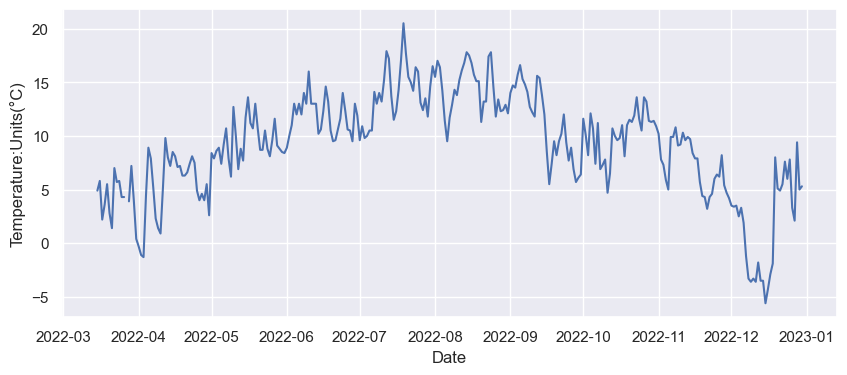

In [42]:
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(tmin_test['date'], tmin_test['tmin'])
plt.xlabel('Date')
plt.ylabel(r'Temperature:Units(' + chr(176) + 'C)')